<br>
@Author: Ayush Prajapati<br>
@Date: 02-09-2024 <br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 03-09-2024 <br>
@Title: Read and Write Operations using PySpark<br><br>

### Importing Libraries<br>

In [18]:
from pyspark.sql import SparkSession
from py4j.protocol import Py4JJavaError
import os
import json


### Create a Spark session<br>

In [60]:
spark = SparkSession.builder.appName("Read/Write").getOrCreate()

### Read and Display the Parquet file<br>

In [6]:
titanic_df = spark.read.parquet("file:/home/hdoop/datasets/Titanic.parquet")

In [7]:
titanic_df.show()


[Stage 1:>                                                          (0 + 1) / 1]



+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

### Perform basic operations<br>

In [8]:
print("Number of records:", titanic_df.count())
print("\nTitanic Parquet Schema is:\n")
titanic_df.printSchema()


Number of records: 891

Titanic Parquet Schema is:

root
 |-- PassengerId: long (nullable = true)
 |-- Survived: long (nullable = true)
 |-- Pclass: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: long (nullable = true)
 |-- Parch: long (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



### Convert to Parquet to CSV<br>

In [44]:
titanic_df.write.csv("file:/home/hdoop/Documents/Titanic.csv", header=True)


In [45]:
titanic_csv_df = spark.read.csv("file:/home/hdoop/Documents/Titanic.csv")
titanic_csv_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        _c0|     _c1|   _c2|                 _c3|   _c4| _c5|  _c6|  _c7|             _c8|    _c9| _c10|    _c11|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|      

### Convert to Parquet to text<br>

In [43]:
# Concatenate all the columns into a single string for each row
titanic_df.rdd.map(lambda row: ','.join(str(value) for value in row))\
          .saveAsTextFile("file:/home/hdoop/Documents/Titanic.txt")


In [73]:
spark.stop()

### Read and Display Avro files<br>

In [3]:
spark = SparkSession.builder \
    .appName("Avro Example") \
    .config("spark.jars.packages", "org.apache.spark:spark-avro_2.12:3.2.2") \
    .getOrCreate()

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/hdoop/.ivy2/cache
The jars for the packages stored in: /home/hdoop/.ivy2/jars
org.apache.spark#spark-avro_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-9ebad359-01f3-42f3-a2ef-5a39b92dffc9;1.0
	confs: [default]
	found org.apache.spark#spark-avro_2.12;3.2.2 in central
	found org.tukaani#xz;1.8 in central
	found org.spark-project.spark#unused;1.0.0 in central
:: resolution report :: resolve 567ms :: artifacts dl 17ms
	:: modules in use:
	org.apache.spark#spark-avro_2.12;3.2.2 from central in [default]
	org.spark-project.spark#unused;1.0.0 from central in [default]
	org.tukaani#xz;1.8 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     | 

In [71]:
# import pyspark.sql.avro as avro

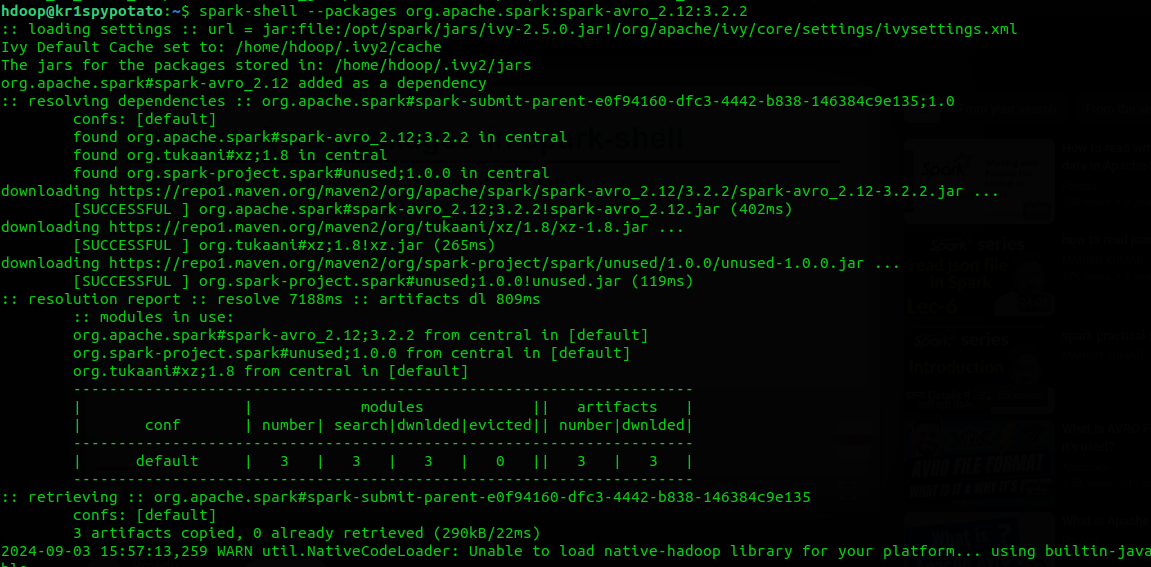

In [5]:
avro_df = spark.read.format("avro").load("file:/home/hdoop/datasets/sampledata.avro")

In [ ]:
# pyspark --packages org.apache.spark:spark-avro_2.12:3.2.2

In [7]:
# Show the data
avro_df.show()

+--------------------+---+-----------+---------+--------------------+------+---------------+-------------------+-------------+----------+---------+--------------------+--------------------+
|   registration_dttm| id| first_name|last_name|               email|gender|     ip_address|                 cc|      country| birthdate|   salary|               title|            comments|
+--------------------+---+-----------+---------+--------------------+------+---------------+-------------------+-------------+----------+---------+--------------------+--------------------+
|2016-02-04T10:34:07Z|  1|      Kelly|    Ortiz|kortiz0@omniture.com|Female|252.115.158.159|   3537905681760845|       Russia| 4/23/1980|277302.99|               Nurse|                    |
|2016-02-04T22:54:01Z|  2|     Sharon|  Carroll|scarroll1@disqus.com|Female|  29.217.252.62|  56022458507191696|    Indonesia| 8/28/1992|209258.05|           Recruiter|         åß∂ƒ©˙∆˚¬…æ|
|2016-02-04T17:59:50Z|  3|       Ruth|     Ross|  

### Perform Basic Operations on avro<br>

In [8]:
print(f"Number of rows: {avro_df.count()}")

# Print the schema
avro_df.printSchema()

Number of rows: 1000
root
 |-- registration_dttm: string (nullable = true)
 |-- id: long (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- cc: long (nullable = true)
 |-- country: string (nullable = true)
 |-- birthdate: string (nullable = true)
 |-- salary: double (nullable = true)
 |-- title: string (nullable = true)
 |-- comments: string (nullable = true)



In [10]:
# Convert to JSON and save locally
avro_df.write.json("file:/home/hdoop/Documents/avro_to_json.json")



[Stage 5:>                                                          (0 + 1) / 1]



### Read and Display Json<br>

In [12]:
json_df = spark.read.json("file:/home/hdoop/Documents/avro_to_json.json")


In [17]:
# Show only one record
json_df.show()


+----------+-------------------+--------------------+-------------+--------------------+-----------+------+---+---------------+---------+--------------------+---------+--------------------+
| birthdate|                 cc|            comments|      country|               email| first_name|gender| id|     ip_address|last_name|   registration_dttm|   salary|               title|
+----------+-------------------+--------------------+-------------+--------------------+-----------+------+---+---------------+---------+--------------------+---------+--------------------+
| 4/23/1980|   3537905681760845|                    |       Russia|kortiz0@omniture.com|      Kelly|Female|  1|252.115.158.159|    Ortiz|2016-02-04T10:34:07Z|277302.99|               Nurse|
| 8/28/1992|  56022458507191696|         åß∂ƒ©˙∆˚¬…æ|    Indonesia|scarroll1@disqus.com|     Sharon|Female|  2|  29.217.252.62|  Carroll|2016-02-04T22:54:01Z|209258.05|           Recruiter|
| 6/13/1994|   3589642396435648|                  

### Print JSON in proper format<br>

In [22]:
# Get the first record as a Row object and convert it to a dictionary
record = json_df.take(4)[0].asDict()

# Pretty-print the dictionary as JSON
print(json.dumps(record, indent=4))

{
    "birthdate": "4/23/1980",
    "cc": 3537905681760845,
    "comments": "",
    "country": "Russia",
    "email": "kortiz0@omniture.com",
    "first_name": "Kelly",
    "gender": "Female",
    "id": 1,
    "ip_address": "252.115.158.159",
    "last_name": "Ortiz",
    "registration_dttm": "2016-02-04T10:34:07Z",
    "salary": 277302.99,
    "title": "Nurse"
}


In [24]:
spark.stop()